In [29]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import jieba
import time
from jieba import analyse

In [3]:
file_1 = open('data/pro_zh_wiki_01',mode='r',encoding='utf-8')
text_1 = file_1.readlines()
file_1.close()

In [4]:
dict = ''.join(text_1)
dict[0:100000]

'="5064250"=":..?=5064250"="塞缪尔·J·兰德尔"塞缪尔·J·兰德尔塞缪尔·杰克逊·兰德尔（，）是美国民主党政治家，于19世纪下半叶担任宾夕法尼亚州联邦众议员，曾是第33任众议院议长，并两次参与党派美国总统候选人提名的竞争。兰德尔生于费城辉格党政治世家，在辉格党消亡后加入民主党。19世纪50年代，兰德尔当选费城市议员，拉开从政生涯序幕，接下来又进入宾夕法尼亚州参议院。南北战争期间，兰德尔在北军骑兵队服役，于1862年当选联邦众议员，此后一直连任直至去世。作为工业州的代表，兰德尔以坚定捍卫旨在帮助国内制造行业对抗国际竞争的保护性关税著称。虽然在关税问题上经常同共和党人站在一边，但他也像其他大部分民主党议员一样反对重建法案和联邦权力的扩张。兰德尔坚持缩减中央政府规模、减少集权，在众议院的民主党人中崭露头角，于1876年当选议长，并且一直任职到1881年共和党重夺众议院多数时止。1880和1884年，兰德尔两次加入民主党总统候选人提名的争夺，但他对高关税的支持也疏远了许多民主党人。1883年民主党再度赢得众议院多数时，兰德尔未能当选议长，但继续在国会领导拨款委员会。虽然仍是广受尊重的党派领导人，但他的影响力伴随着民主党逐渐偏向支持自由贸易而缩减，身体状况也不断恶化。1890年4月13日，塞缪尔·杰克逊·兰德尔在哥伦比亚特区逝世，享年61岁。塞缪尔·杰克逊·兰德尔于1828年10月10日在宾夕法尼亚州费城出生，他的父亲叫乔赛亚·兰德尔（），母亲叫安·沃瑞尔·兰德尔（），塞缪尔是两人的长子，家中之后再添3丁，分别起名威廉（）、罗伯特（）和亨利（）。乔赛亚曾于19世纪20年代在州议会任职，是费城数一数二的律师。塞缪尔的爷爷马修·兰德尔（）是19世纪初宾夕法尼亚州普通法法院的法官，还是费城的县法院首席书记官。赛缪尔的姥爷约瑟夫·沃瑞尔（）则在托马斯·杰斐逊执政期间积极参与民主党政治事务。乔赛亚以辉格党人身份从政，但在19世纪50年代该党瓦解后转投民主党的怀抱。塞缪尔出生时，他的家人住在费城第七街和核桃街之间，这里如今属中心城区，包括中心商务区和中部地区。赛缪尔在隶属宾夕法尼亚大学的大学学院接受教育，于17岁那年毕业。但他没有跟随父亲的脚步开始从事法律工作，而是成为当地某丝稠商人的记帐员。此后不久，他开办煤炭运输业务，仅21岁就成为废铁业务公司“厄普和兰德

In [18]:
dict[100:109]

'院议长，并两次参与'

In [110]:
with open('data/pro_zh_wiki_01',mode='r',encoding='utf-8') as f:
    document = f.read()
    document = document[100:10000]
    #document_decode = document.decode('GBK')
    
    document_cut = jieba.cut(document)
    #print  ' '.join(jieba_cut)  //如果打印结果，则分词效果消失，后面的result无法显示
    result = ' '.join(document_cut)
    with open('data/pro_zh_wiki_01_segment.txt', 'w',encoding='utf-8') as f2:
        f2.write(result)
f.close()
f2.close()

In [37]:
text = dict[100:109]
#导入自定义词典
#jieba.load_userdict("D:\Program Files\Python36\Lib\site-packages\jieba\mydict.txt")
stopwords = {}.fromkeys(['的', '包括', '等', '是'])
# 全模式
seg_list = jieba.cut(text, cut_all=True)
print(u"[全模式]: ", "/ ".join(seg_list))

# 精确模式
seg_list = jieba.cut(text, cut_all=False)
print(u"[精确模式]: ", "/ ".join(seg_list))

# 搜索引擎模式
seg_list = jieba.cut_for_search(text)
print(u"[搜索引擎模式]: ", "/ ".join(seg_list))

#获取关键词
tags = jieba.analyse.extract_tags(text)
print(u"[关键词]: ", "/ ".join(tags))

[全模式]:  院/ 议长/ / / 并/ 两次/ 参与
[精确模式]:  院/ 议长/ ，/ 并/ 两次/ 参与
[搜索引擎模式]:  院/ 议长/ ，/ 并/ 两次/ 参与
[关键词]:  议长/ 两次/ 参与


In [101]:
text = dict[100:10000]
seg_list = jieba.cut(text, cut_all=True)
vocabulary = set()
for word in seg_list:
    vocabulary.add(word)

In [125]:
s = time.time()
mini_model = Word2Vec(list(vocabulary), min_count=1, size=20)
e = time.time()
print(e-s)

0.08363103866577148


In [113]:
s = time.time()
mini2_model = Word2Vec(LineSentence('data/pro_zh_wiki_01_segment.txt'), min_count=1, size=20)
e = time.time()
print(e-s)

0.08276009559631348


In [81]:
mini_model.wv['兵']

array([-0.01294535,  0.00146626,  0.01412663,  0.0205666 ,  0.01810087,
       -0.01811426, -0.02400376, -0.02459029, -0.00307965, -0.01395297,
        0.02208137, -0.00219066,  0.01807281, -0.02018597,  0.01137248,
        0.00539176,  0.01562771, -0.00717564,  0.00890238,  0.02394771], dtype=float32)

In [114]:
mini2_model.wv['兵']

array([-0.01360731,  0.00133364,  0.01383718,  0.02118772,  0.01872029,
       -0.01650596, -0.02292754, -0.02353866, -0.00307448, -0.01471253,
        0.02147338, -0.00228065,  0.01626474, -0.01930697,  0.0106109 ,
        0.00609717,  0.01389026, -0.00577211,  0.00962404,  0.02249181], dtype=float32)

In [117]:
req_count = 1
for key in mini2_model.wv.similar_by_word('兵', topn =100):
    if len(key[0])==3:
        req_count -= 1
        print (key[0], key[1])
        if req_count == 0:
            break;

主战派 0.4230806231498718


In [118]:
mini_model.wv.doesnt_match(u"兵 领 高 领导".split())

'高'

#Visualization Word2Vec by T-SEN
#Reference https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [90]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

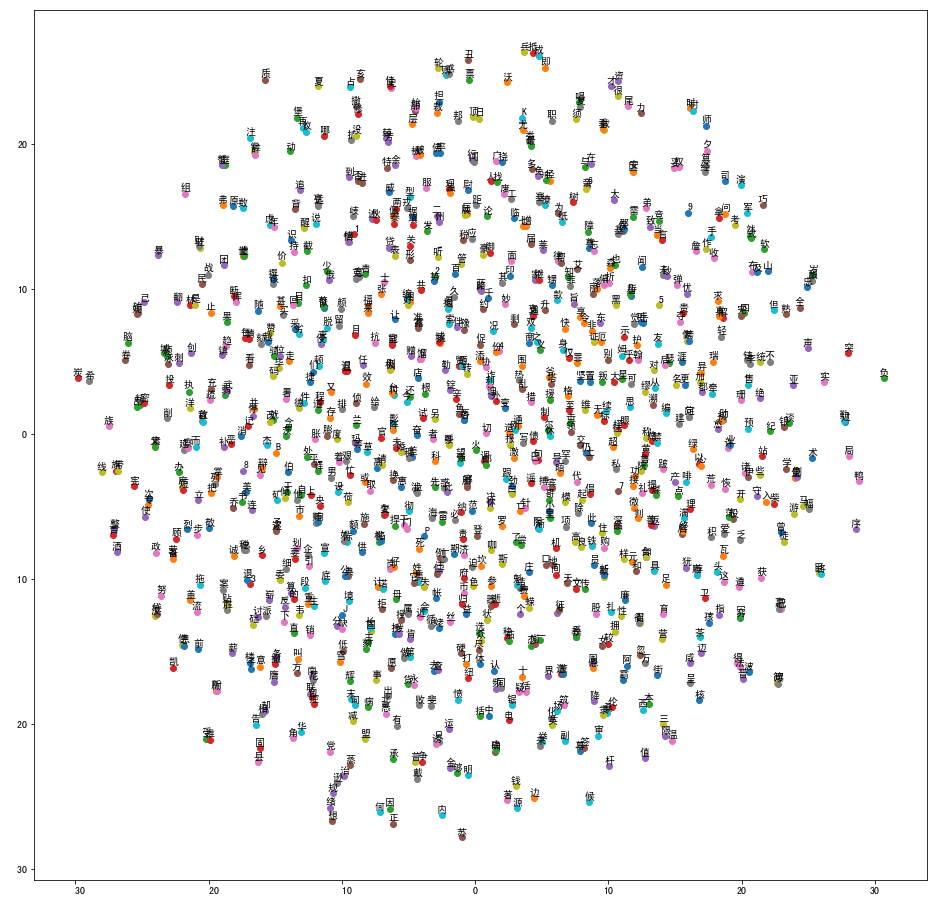

In [126]:
tsne_plot(mini_model)

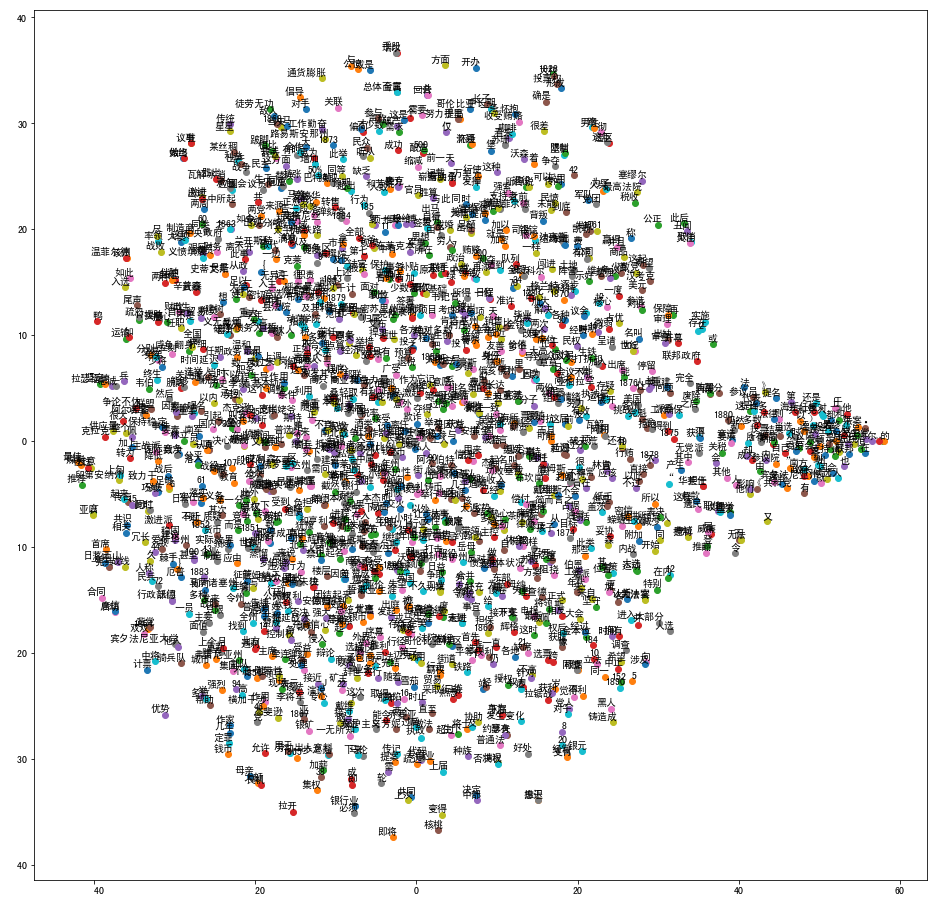

In [119]:
tsne_plot(mini2_model)

In [95]:
mini_model.most_similar('受')

[('再', 0.5888266563415527),
 ('议', 0.5307133197784424),
 ('角', 0.5182101726531982),
 ('内', 0.45778030157089233),
 ('主', 0.4325919449329376),
 ('员', 0.4234638214111328),
 ('状', 0.40580758452415466),
 ('分', 0.3963334858417511),
 ('铁', 0.395065039396286),
 ('部', 0.38887888193130493)]